Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal


Load data

In [4]:
# Load all CSVs
df_benin = pd.read_csv("data/benin_clean.csv")
df_sierra = pd.read_csv("data/sierraleone_clean.csv")
df_togo = pd.read_csv("data/togo_clean.csv")

# Add country labels
df_benin['Country'] = 'Benin'
df_sierra['Country'] = 'Sierra Leone'
df_togo['Country'] = 'Togo'

# Combine them
df_all = pd.concat([df_benin, df_sierra, df_togo], ignore_index=True)


Metric Comparison

C:\Users\girmachewgulint\AppData\Local\Temp\ipykernel_13692\1195085345.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette=custom_palette)
C:\Users\girmachewgulint\AppData\Local\Temp\ipykernel_13692\1195085345.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette=custom_palette)
C:\Users\girmachewgulint\AppData\Local\Temp\ipykernel_13692\1195085345.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=df_all, palette=custom_pale

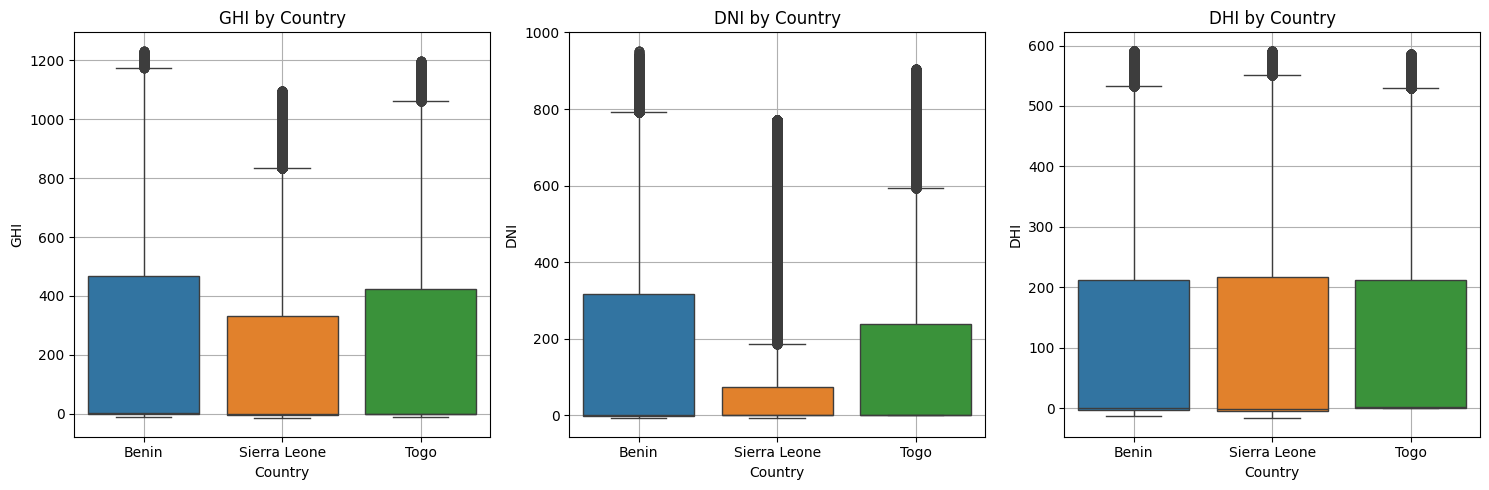

In [10]:
custom_palette = {
    'Benin': '#1f77b4',          # blue
    'Sierra Leone': '#ff7f0e',   # orange
    'Togo': '#2ca02c'            # green
}

metrics = ['GHI', 'DNI', 'DHI']
plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Country', y=metric, data=df_all, palette=custom_palette)
    plt.title(f'{metric} by Country')
    plt.ylabel(metric)
    plt.grid(True)

plt.tight_layout()
plt.show()

Summary Statistics & Missing-Value Report

In [6]:
summary = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
summary.columns = ['_'.join(col) for col in summary.columns]
summary.reset_index(inplace=True)

# Display
print(summary)


        Country    GHI_mean  GHI_median     GHI_std    DNI_mean  DNI_median  \
0         Benin  236.234508         0.7  328.288787  166.896673        -0.1   
1  Sierra Leone  185.000024        -0.4  279.019460  104.128943        -0.1   
2          Togo  223.859675         0.5  317.306277  147.975931         0.0   

      DNI_std    DHI_mean  DHI_median     DHI_std  
0  262.081997  111.656477         0.5  153.099749  
1  200.954182  108.104278        -0.6  153.691835  
2  247.683690  112.781249         1.5  151.571744  


In [11]:
anova_result = f_oneway(
    df_benin['GHI'],
    df_sierra['GHI'],
    df_togo['GHI']
)

print("One-way ANOVA p-value for GHI:", anova_result.pvalue)


One-way ANOVA p-value for GHI: 0.0


In [12]:
kruskal_result = kruskal(
    df_benin['GHI'],
    df_sierra['GHI'],
    df_togo['GHI']
)

print("Kruskal–Wallis p-value for GHI:", kruskal_result.pvalue)


Kruskal–Wallis p-value for GHI: 0.0


### 🔍 Key Observations

- **Benin** has the **highest average GHI (236.2)** and **DNI (166.9)**, suggesting it receives more solar radiation on average than Togo and Sierra Leone. However, it also has the **highest variability in GHI (std = 328.3)** and **DNI (std = 262.1)**, indicating **large fluctuations** in solar irradiance.

- **Sierra Leone** shows the **lowest mean GHI (185.0)** and **DNI (104.1)**, with a **median below zero**, indicating frequent periods with **little or no direct solar radiation**. This may be due to more cloud cover or weather-related conditions.

- **Togo** presents a **balance between Benin and Sierra Leone**, with a **moderate GHI mean (223.9)** and **median slightly positive (0.5)**. It also has the **highest median DHI (1.5)**, suggesting relatively **stable diffuse solar radiation**.


# Visual Summary

C:\Users\girmachewgulint\AppData\Local\Temp\ipykernel_13692\1094958207.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')


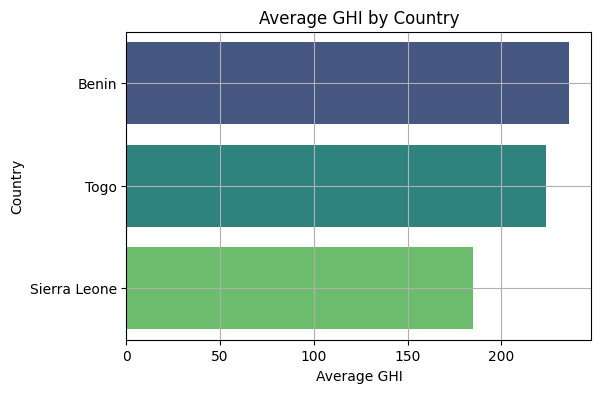

In [ ]:
# A small bar chart ranking countries by average GHI
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')
plt.xlabel("Average GHI")
plt.title("Average GHI by Country")
plt.grid(True)
plt.show()
